### **Description**:Learn how to use keras sequential api in Tensorflow

I used a mnist digit dataset to classify different digits.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


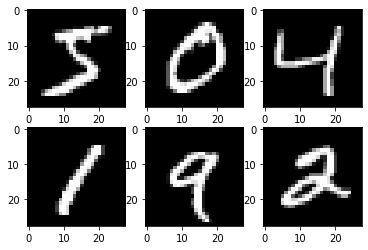

In [5]:
# normalize: 0, 255 - > 0, 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# visualize
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')
plt.show()

In [9]:
# model
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28, 28)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10)
    ]
)

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

In [12]:
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [14]:
# training
batch_size = 64
epochs = 5
model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    shuffle=True, 
    verbose=2
)

Epoch 1/5
938/938 - 2s - loss: 0.3010 - accuracy: 0.9159
Epoch 2/5
938/938 - 2s - loss: 0.1363 - accuracy: 0.9608
Epoch 3/5
938/938 - 2s - loss: 0.0946 - accuracy: 0.9721
Epoch 4/5
938/938 - 2s - loss: 0.0717 - accuracy: 0.9786
Epoch 5/5
938/938 - 2s - loss: 0.0569 - accuracy: 0.9829


In [15]:
# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0789 - accuracy: 0.9751


[0.07888294756412506, 0.9750999808311462]

In [16]:
# predictions
probability_model = keras.Sequential(
    [
     model,
     keras.layers.Softmax()
    ]
)

In [17]:
predictions = probability_model(x_test)

In [19]:
pred0 = predictions[0]
pred0

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.8761652e-07, 4.5583253e-08, 1.2662028e-05, 9.3173597e-04,
       1.1319991e-10, 3.8295639e-07, 4.5894213e-10, 9.9902880e-01,
       8.1286589e-06, 1.7997450e-05], dtype=float32)>

In [20]:
label0 = np.argmax(pred0)
label0

7

In [23]:
# model + softmax
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
label = np.argmax(pred0)
print(label0)

7
